<a href="https://colab.research.google.com/github/bishalbhattacharjee003/Iris_Flower_Classification/blob/main/Iris_Flower_Classification_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For inline visualization in Jupyter Notebooks
%matplotlib inline

# Define column names for the dataset
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class']

# Load the Iris dataset from a CSV file
df = pd.read_csv('/content/iris.data', names=columns)

# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Sepal Length  Sepal Width  Petal Length  Petal Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
# Summary statistics of the dataset to understand basic characteristics
print("\nDataset summary statistics:")
print(df.describe())


Dataset summary statistics:
       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


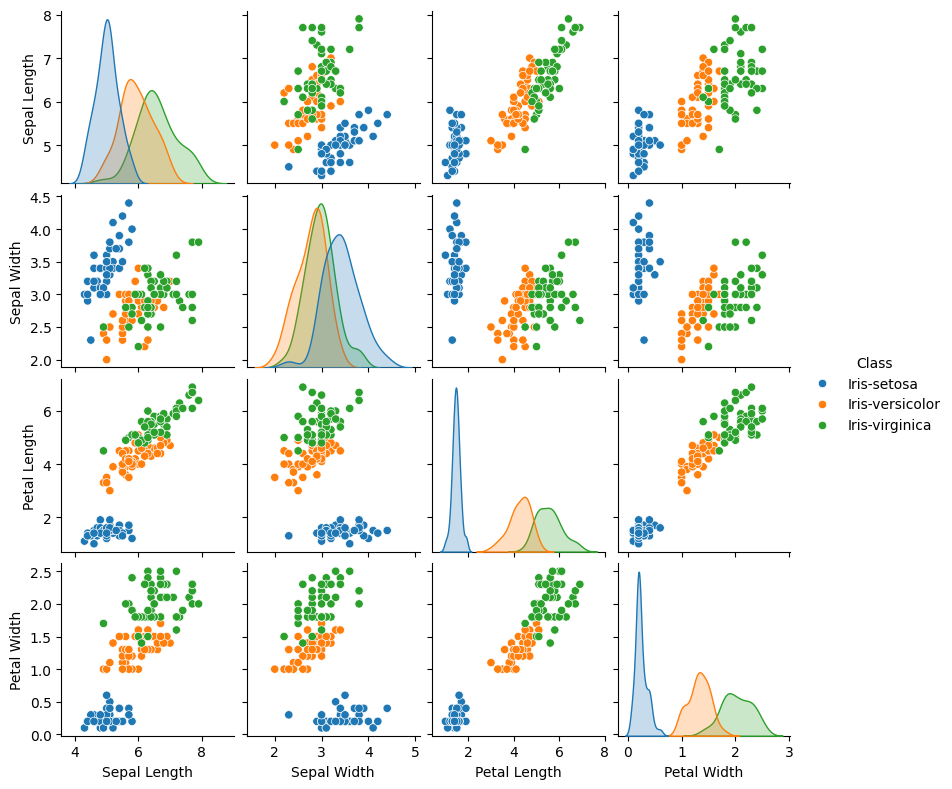

In [5]:
# Pairplot visualization for feature distribution and class distinction
sns.pairplot(df, hue='Class', height=2)
plt.show()

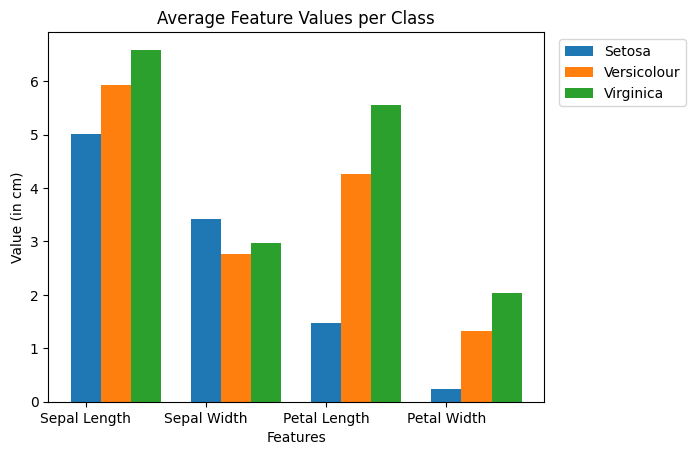

In [6]:
# Separate feature data (X) and target labels (Y)
data = df.values  # Convert dataframe to numpy array
X = data[:, 0:4]  # Feature data (first four columns)
Y = data[:, 4]    # Class labels (fifth column)

# Calculate the average feature value for each class and feature
Y_Data = np.array([
    np.average(X[:, i][Y == j].astype('float32'))
    for i in range(X.shape[1])
    for j in np.unique(Y)
])

# Reshape the average feature values for plotting
Y_Data_reshaped = Y_Data.reshape(4, 3)  # 4 features, 3 classes
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)  # Transpose for better plotting

# Bar plot to compare average feature values across classes
X_axis = np.arange(len(columns) - 1)  # Indices for feature names
width = 0.25  # Bar width

# Plot bars for each class
plt.bar(X_axis, Y_Data_reshaped[0], width, label='Setosa')
plt.bar(X_axis + width, Y_Data_reshaped[1], width, label='Versicolour')
plt.bar(X_axis + width * 2, Y_Data_reshaped[2], width, label='Virginica')

# Add labels and legend
plt.xticks(X_axis, columns[:4])  # Use feature names for x-axis
plt.xlabel("Features")
plt.ylabel("Value (in cm)")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title("Average Feature Values per Class")
plt.show()

In [8]:
# Import library for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Import library for Support Vector Classification
from sklearn.svm import SVC

# Create and train the Support Vector Classifier model
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svc_model.predict(X_test)

# Import accuracy metric and evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
print("\nModel accuracy: {:.2f}%".format(accuracy * 100))


Model accuracy: 100.00%


In [9]:
# Classification report for detailed model evaluation
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
# Predict species for new data points
X_new = np.array([
    [3, 2, 1, 0.2],       # Hypothetical data point 1
    [4.9, 2.2, 3.8, 1.1], # Hypothetical data point 2
    [5.3, 2.5, 4.6, 1.9]  # Hypothetical data point 3
])

predictions_new = svc_model.predict(X_new)
print("\nPredictions for new data points:")
for i, pred in enumerate(predictions_new):
    print(f"Data point {i+1}: Predicted species is {pred}")


Predictions for new data points:
Data point 1: Predicted species is Iris-setosa
Data point 2: Predicted species is Iris-versicolor
Data point 3: Predicted species is Iris-virginica
